# Exploratory Data Analysis (EDA)
**Install Necessary Libraries**

Activate your virtual environment and install the required packages:

In [1]:
pip install pandas numpy matplotlib seaborn nltk


**Load the Dataset**

Create a new script data_preprocessing.py in your project root or use a Jupyter Notebook.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Display the first few rows
print(df.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

**Understand the Data Structure**

In [3]:
# Get dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# View descriptive statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                  

**Analyze Review Scores Distribution**

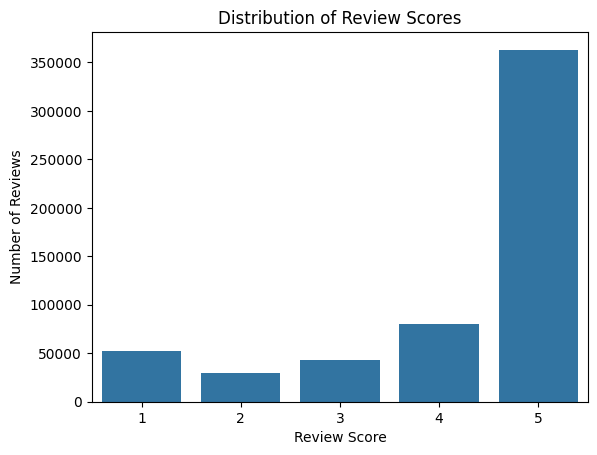

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of review scores
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()


# Data Cleaning
**Handle Missing Values**

Identify columns with missing values:

In [5]:
# Check for missing values
print(df.isnull().sum())


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


Common columns with missing values are Summary and Text.

Remove rows with missing Text data:

In [6]:
# Drop rows where 'Text' is NaN
df = df.dropna(subset=['Text'])


**Remove Duplicates**

In [7]:
# Check for duplicates
print(f"Number of duplicate reviews: {df.duplicated().sum()}")

# Remove duplicate reviews
df = df.drop_duplicates()


Number of duplicate reviews: 0


**Normalize Text Data**

Convert all text to lowercase and remove unwanted characters.

In [8]:
# Convert text to lowercase
df['Text'] = df['Text'].str.lower()

# Import string library to remove punctuation
import string

# Function to remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function
df['Text'] = df['Text'].apply(remove_punctuation)


# Text Preprocessing

We'll use NLTK for natural language processing tasks.


**Install and Download NLTK Data**

In [9]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Tokenization**

In [10]:
from nltk.tokenize import word_tokenize

# Tokenize the 'Text' column
df['Tokens'] = df['Text'].apply(word_tokenize)


**Remove Stop Words**

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply the function
df['Tokens'] = df['Tokens'].apply(remove_stopwords)


**Lemmatization**

In [12]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply the function
df['Tokens'] = df['Tokens'].apply(lemmatize_tokens)


# Data Labeling

We'll convert numerical review scores into categorical sentiment labels.


**Define Sentiment Labels**

    
    
    



*   **Positive:** Ratings of 4 or 5
*   **Negative:** Ratings of 1 or 2
*   **Neutral:** Rating of 3 (optional; for binary classification, you can exclude these)


**Filter and Label the Data**

For binary classification, exclude neutral reviews:

In [13]:
# Remove neutral reviews
df = df[df['Score'] != 3]

# Map scores to sentiments
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')


<ipython-input-13-cfbb7e2bf9b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')


**Check Class Distribution**

Sentiment
positive    443777
negative     82037
Name: count, dtype: int64


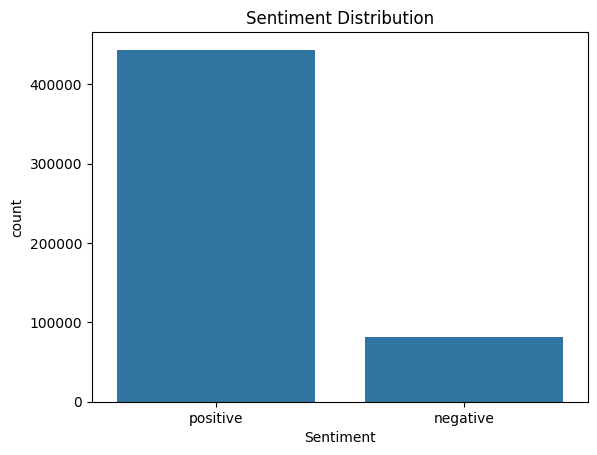

In [14]:
# Count of sentiments
print(df['Sentiment'].value_counts())

# Plot the distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


# Data Splitting

**Prepare the Data**


Join tokens back into a string for model input:

In [15]:
# Join tokens into a single string
df['Processed_Text'] = df['Tokens'].apply(lambda tokens: ' '.join(tokens))


**Define Features and Labels**

In [16]:
X = df['Processed_Text']
y = df['Sentiment']


**Split into Training and Testing Sets**

In [17]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# Save Preprocessed Data


**Export Data to CSV**

In [19]:
# Combine features and labels
train_data = pd.DataFrame({'Text': X_train, 'Sentiment': y_train})
test_data = pd.DataFrame({'Text': X_test, 'Sentiment': y_test})

# Save to CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
